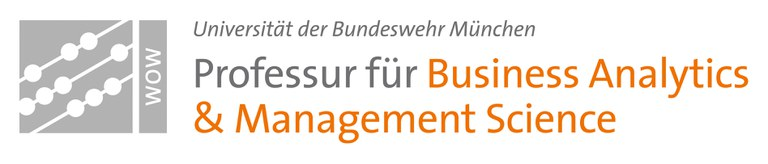

# Traveling Salesman Problem - Beispielinstanz Vorlesung - PuLP
### Universität der Bundeswehr München - Prof. Dr. Claudius Steinhardt - Logistics Analytics
Erstellt von Sebastian Knall, am 29.03.2022

Dieses Notebook bezieht sich auf das Traveling Salesman Problem (TSP) Beispiel 3.1.3 der Vorlesung Logistics Analytics. Die TSP Instanz wird mit dem Open Source Solver PuLP (https://pypi.org/project/PuLP/) gelöst.

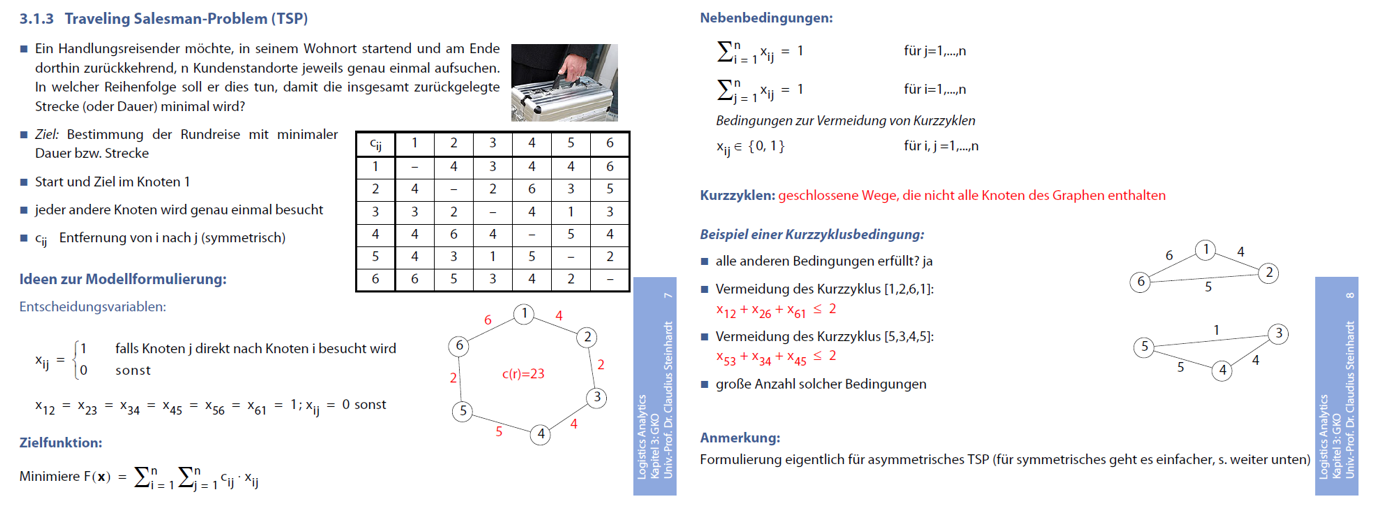

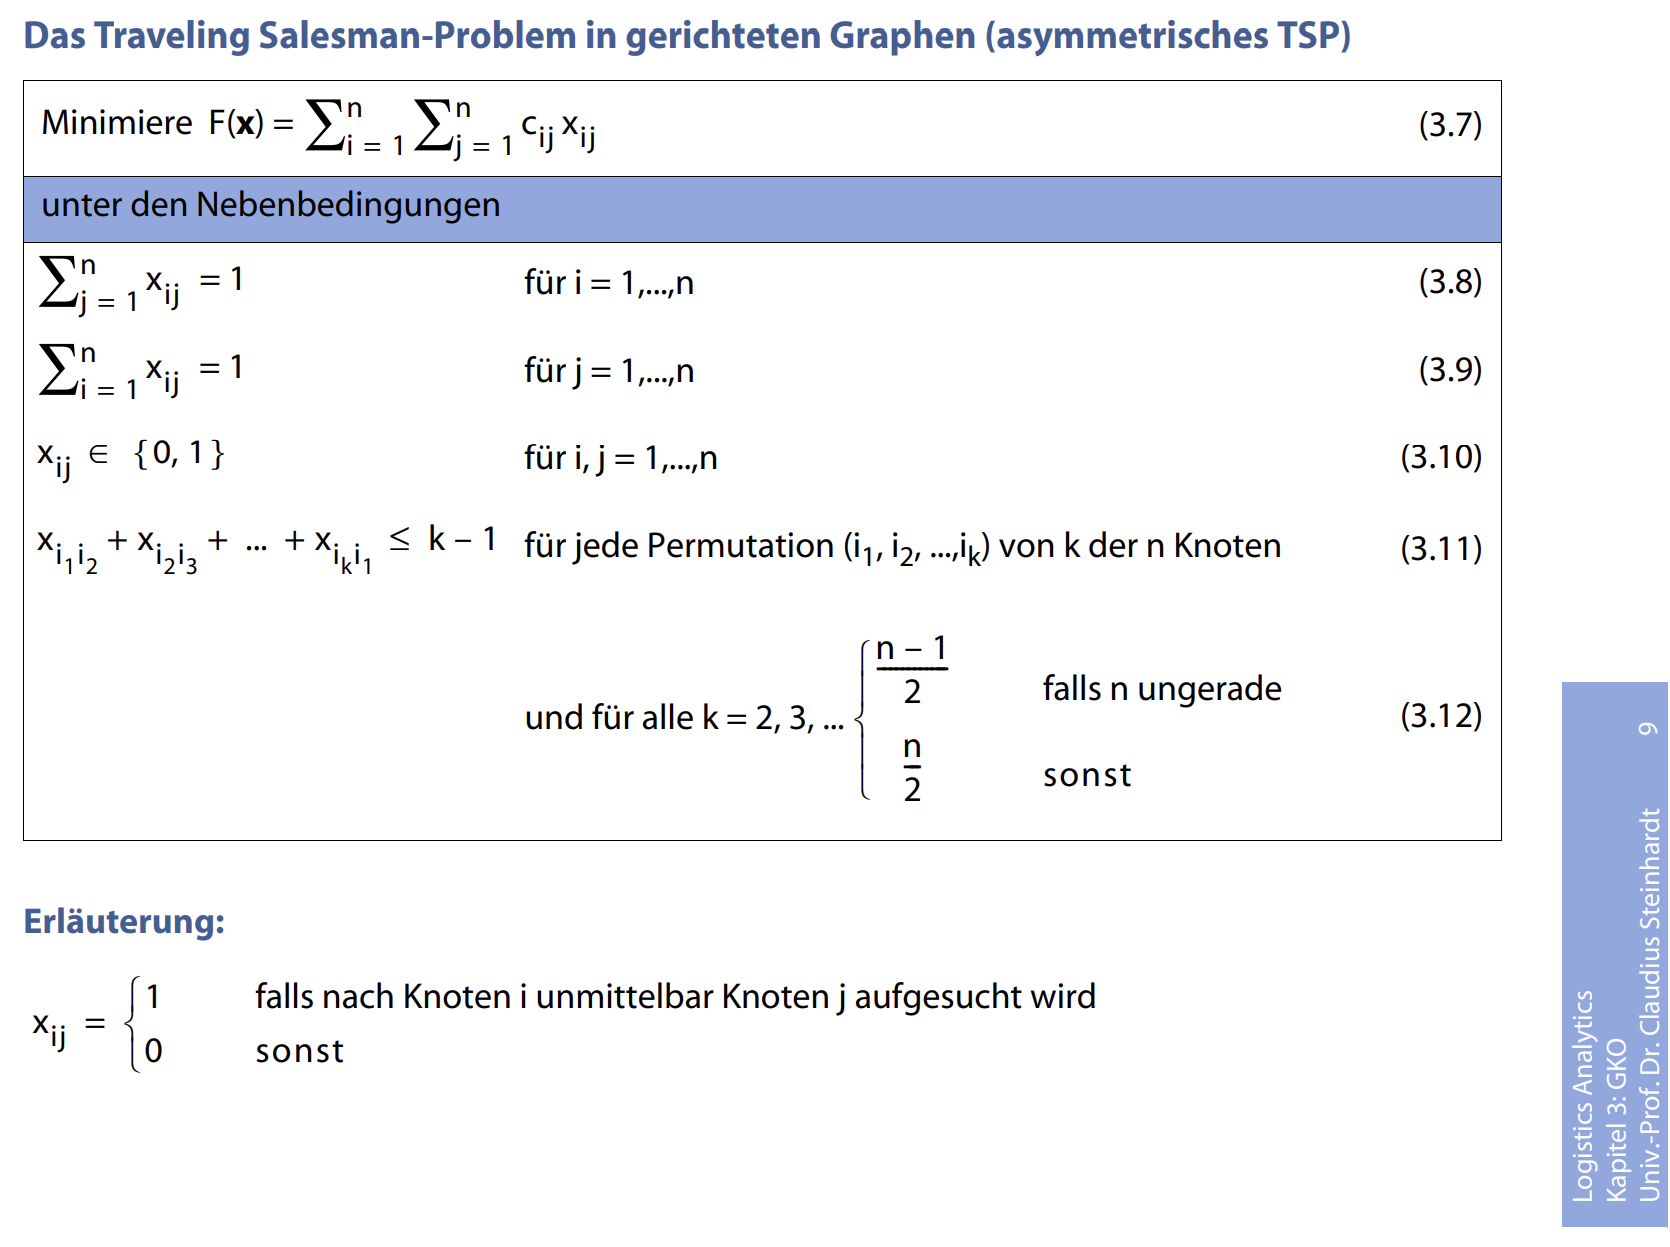

In [1]:
# Importieren der Bibliotheken
import itertools
import pulp
from pulp import *

In [2]:
# Initialisieren eines neuen PuLP-Modells als Minimierungsproblem
m = LpProblem("TSP", LpMinimize)

In [3]:
# Festlegen Kundenstandorte
n = 6

# Menge mit allen Knoten
N = list(range(1, n + 1))

# Maximales k (k = Länge einer Permutation)
kmax = int(n/2)

# Menge mit allen k
K = list(range(2,kmax + 1))

# Menge aller Permutationen
permutations = []
for k in K:
    permutation = list(itertools.combinations(N, k))
    permutations += permutation

print("Permutationen:", permutations)



Permutationen: [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 4, 5), (1, 4, 6), (1, 5, 6), (2, 3, 4), (2, 3, 5), (2, 3, 6), (2, 4, 5), (2, 4, 6), (2, 5, 6), (3, 4, 5), (3, 4, 6), (3, 5, 6), (4, 5, 6)]


In [4]:
#  Erstellen Entfernungsmatrix (cij)
entfernungen = [
    [0,4,3,4,4,6],
    [4,0,2,6,3,5],
    [3,2,0,4,1,3],
    [4,6,4,0,5,4],
    [4,3,1,5,0,2],
    [6,5,3,4,2,0],
]

In [5]:
# Initialisierung der Variablen
# Variablen könnten durch vier Parameter spezifiziert werden: Name, untere Grenze, obere Grenze und Typ (ganzzahlig, kontinuierlich, binär)
# Sind keine Parameter angegeben, werden Standardwerte verwendet
# Bei binären Variablen ist keine Angabe der Grenzen erforderlich

# Initialisieren der Entscheidungsvariablen, die angeben ob Knoten j direkt nach Knoten i besucht wird 
x = LpVariable.dicts('x', ((i, j) for i in range(1, n + 1) for j in range(1, n + 1)), lowBound=0, upBound=1, cat='Binary')

In [6]:
# Zielfunktion
m += lpSum(entfernungen[i-1][j-1] * x[i, j] for i in range(1, n + 1) for j in range(1, n + 1))

In [7]:
# Nebenbedingung, die sicherstellen das jeder Knoten von sich selbst 0 entfernt ist
for i in range(1, n + 1):
   m += x[i, i] == 0

# Nebenbedingung, die sicherstellen das jeder Standort genau einmal besucht wird
for i in range(1, n + 1):
    m += lpSum(x[i, j] for j in range(1, n + 1)) == 1
    m += lpSum(x[j, i] for j in range(1, n + 1)) == 1

In [20]:
# Nebenbedingung, die sicherstellen, dass Kurzzyklen vermieden werden (3.11)
for permutation in permutations:
    m += lpSum(x[permutation[i], permutation[i+1]] for i in range(len(permutation)-1)) + x[permutation[-1], permutation[0]] <= \
    len(permutation) - 1

# Statt für alle Möglichkeiten ein einzelnes Problem zu erstellen wird über die Varible u generalisiert            
# m += x[1, 2] + x[2, 6] + x[6, 1] <= 2
# m += x[5, 3] + x[3, 4] + x[4, 5] <= 2
# m...
 
# Für eine alternative Nebenbedingung mit einer zweiten Entscheidungsvarible 'u' siehe
# 'Traveling Salesman Problem - Zufällige Instanz - PuLP'

In [17]:
# Lösen des Modells
m.solve()

1

In [18]:
# Ausgeben des Status
print("Status:", LpStatus[m.status])

Status: Optimal


In [19]:
# Ausgeben der Knoten und deren Reihenfolge
# z.B. x(0,3) = 1 -> Standort 4 (mit Index 3) wird direkt nach Standort 1 (mit Index 0) besucht

for v in m.variables():
    print(v.name.replace("_", ""), "=", v.varValue)
        
# Ausgeben Mindestentfernung
print("Mindestentfernung: ", value(m.objective))

x(1,1) = 0.0
x(1,2) = 0.0
x(1,3) = 0.0
x(1,4) = 1.0
x(1,5) = 0.0
x(1,6) = 0.0
x(2,1) = 1.0
x(2,2) = 0.0
x(2,3) = 0.0
x(2,4) = 0.0
x(2,5) = 0.0
x(2,6) = 0.0
x(3,1) = 0.0
x(3,2) = 1.0
x(3,3) = 0.0
x(3,4) = 0.0
x(3,5) = 0.0
x(3,6) = 0.0
x(4,1) = 0.0
x(4,2) = 0.0
x(4,3) = 0.0
x(4,4) = 0.0
x(4,5) = 0.0
x(4,6) = 1.0
x(5,1) = 0.0
x(5,2) = 0.0
x(5,3) = 1.0
x(5,4) = 0.0
x(5,5) = 0.0
x(5,6) = 0.0
x(6,1) = 0.0
x(6,2) = 0.0
x(6,3) = 0.0
x(6,4) = 0.0
x(6,5) = 1.0
x(6,6) = 0.0
Mindestentfernung:  17.0
